### Mackenzie Frackleton
### Brenna Manning
## Data Science 2016 Final Project

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

#LOAD DATA
df = pd.read_csv('Kwadela_winter_2013_cleaned.csv')
df['Dusttraks_(mg/m3)']= df['Dusttraks_(mg/m3)']*0.14
print df.info()
df2 = pd.read_csv('Kwadela_winter_2014_cleaned.csv')
df2['Dusttraks_(mg/m3)']= df2['Dusttraks_(mg/m3)']*0.14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125475 entries, 0 to 125474
Data columns (total 24 columns):
Unnamed: 0            125475 non-null int64
Dusttraks_(mg/m3)     116559 non-null float64
PM10_(ug/m3)          64669 non-null float64
PM2.5_(ug/m3)         79939 non-null float64
SO2_(ppb)             86106 non-null float64
CO_(ppm)              18618 non-null float64
NO_(ppb)              65526 non-null float64
NO2_(ppb)             65661 non-null float64
Date                  125475 non-null object
Temperature_(degC)    101947 non-null float64
H01-K-E               125288 non-null float64
H02-K-N               105235 non-null float64
H03-K-S               125304 non-null float64
H04-K-S               125275 non-null float64
H05-K-N               122834 non-null float64
H06-K-N               125353 non-null float64
H07-K-S               81779 non-null float64
H10-K-N               125297 non-null float64
H11-K-X               113919 non-null float64
H12-K-N               125

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#SOME HELPER FUNCTIONS
def get_datetime(s):
    dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    return dt

def preprocess(df):
    res = df.copy()
    datetimes = res.Date.apply(get_datetime)
    res['Hour'] = datetimes.apply(lambda dt: dt.hour)
    res['Day'] = datetimes.apply(lambda dt: dt.day)
    res['Month'] = datetimes.apply(lambda dt: dt.month)
    res['Year'] = datetimes.apply(lambda dt: dt.year)
    return res

def daysSinceStart(df):
    #get time since epoch
    dayArray = np.array(df.Day)
    monthArray = np.array(df.Month)
    
    runningDays = []
    for day, month in zip(dayArray, monthArray):
        if month == 7:
            total_days = 0
            #do nothing, append the normal day
        elif month == 8:
            total_days = 31 
        elif month == 9:
            total_days = 61
        else:
            raise ValueError 
        total_days = total_days + day
        #print'tot days:', total_days, month, day
        runningDays.append(total_days)
    df['DayCount'] = pd.Series(runningDays, index = df.index)
    return df


#Daily Average Temp
def compute_avg_temp(df):
    df['DailyAverageTemp'] = df['Temperature_(degC)'].mean()
    return df

def tempdifference(df, house):
    df['tempdifference'] = df[house]
    df['tempdifference'] = df[house]-df['Temperature_(degC)']
    return df



In [3]:
df = preprocess(df)
df = daysSinceStart(df)
grouped = df.groupby('DayCount')
df = grouped.apply(compute_avg_temp)


### Break dataframe up by temperature ranges of each day

In [4]:
#GENERAL FUNCTION FOR DIURNAL PLOTS

def getmeanfeatureforhour (hourdf, feature):
    res = hourdf[feature].mean()
    return res
def featurehourplot(df, feature, title):
    #feature for example could be a temperature or pollutant concentration
    dfhour0 = df[df['Hour'] == 0]
    feat0 = getmeanfeatureforhour(dfhour0, feature)
    dfhour1 = df[df['Hour'] == 1]
    feat1= getmeanfeatureforhour(dfhour1, feature)
    dfhour2 = df[df['Hour'] == 2]
    feat2 = getmeanfeatureforhour(dfhour2, feature)
    dfhour3 = df[df['Hour'] == 3]
    feat3 = getmeanfeatureforhour(dfhour3, feature)
    dfhour4 = df[df['Hour'] == 4]
    feat4 = getmeanfeatureforhour(dfhour4, feature)
    dfhour5 = df[df['Hour'] == 5]
    feat5 = getmeanfeatureforhour(dfhour5, feature)
    dfhour6 = df[df['Hour'] == 6]
    feat6 = getmeanfeatureforhour(dfhour6, feature)
    dfhour7 = df[df['Hour'] == 7]
    feat7 = getmeanfeatureforhour(dfhour7, feature)
    dfhour8 = df[df['Hour'] == 8]
    feat8 = getmeanfeatureforhour(dfhour8, feature)
    dfhour9 = df[df['Hour'] == 9]
    feat9 = getmeanfeatureforhour(dfhour9, feature)
    dfhour10 = df[df['Hour'] == 10]
    feat10 = getmeanfeatureforhour(dfhour10, feature)
    dfhour11 = df[df['Hour'] == 11]
    feat11 = getmeanfeatureforhour(dfhour11, feature)
    dfhour12 = df[df['Hour'] == 12]
    feat12 = getmeanfeatureforhour(dfhour12, feature)
    dfhour13 = df[df['Hour'] == 13]
    feat13 = getmeanfeatureforhour(dfhour13, feature)
    dfhour14 = df[df['Hour'] == 14]
    feat14 = getmeanfeatureforhour(dfhour14, feature)
    dfhour15 = df[df['Hour'] == 15]
    feat15 = getmeanfeatureforhour(dfhour15, feature)
    dfhour16 = df[df['Hour'] == 16]
    feat16 = getmeanfeatureforhour(dfhour16, feature)
    dfhour17 = df[df['Hour'] == 17]
    feat17 = getmeanfeatureforhour(dfhour17, feature)
    dfhour18 = df[df['Hour'] == 18]
    feat18 = getmeanfeatureforhour(dfhour18, feature)
    dfhour19 = df[df['Hour'] == 19]
    feat19 = getmeanfeatureforhour(dfhour19, feature)
    dfhour20 = df[df['Hour'] == 20]
    feat20 = getmeanfeatureforhour(dfhour20, feature)
    dfhour21 = df[df['Hour'] == 21]
    feat21 = getmeanfeatureforhour(dfhour21, feature)
    dfhour22 = df[df['Hour'] == 22]
    feat22 = getmeanfeatureforhour(dfhour22, feature)
    dfhour23 = df[df['Hour'] == 23]
    feat23 = getmeanfeatureforhour(dfhour23, feature)

    hourlist = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    featlist = [feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,feat12,feat13,feat14,feat15,feat16,feat17,feat18,feat19,feat20,feat21,feat22,feat23]
    plt.plot(hourlist, featlist, label=title)
    plt.legend
    plt.xlabel('Hour')
    if feature[0:1] == 'H0':
        plt.ylabel('House Temp, Degrees C')
    else:
        plt.ylabel(feature)
    plt.title(title)



In [5]:
def compute_avg_temp(df):
    df['DailyAvgTemp'] = df['Temperature_(degC)'].mean()
    return df

grouped = df.groupby('DayCount')
df = grouped.apply(compute_avg_temp)


def getabove14df(df):
    above14df = df[df['DailyAvgTemp'] > 14]
    return above14df
def get1214df(df):
    df1214 = df[df['DailyAvgTemp'] > 12]
    df1214 = df1214[df1214['DailyAvgTemp'] <= 14]
    return df1214
def get1012df(df):  
    df1012 = df[df['DailyAvgTemp'] > 10]
    df1012 = df1012[df1012['DailyAvgTemp'] <= 12]
    return df1012
def get810df(df):  
    df810 = df[df['DailyAvgTemp'] > 8]
    df810 = df810[df810['DailyAvgTemp'] <= 10]
    return df810
def getbelow8(df):
    dfbelow8 = df[df['DailyAvgTemp'] <=8]
    return dfbelow8

# df['Temp_STD'] = pd.rolling_std(df['Temperature_(degC)'], 3, min_periods=1)
# plt.scatter(df['DayCount'], df['Temp_STD'])

# def getwarmdf(df):
#     tempmean = df['DailyAvgTemp'].mean()
#     warmdf = df[df['DailyAvgTemp'] >= tempmean]
#     return warmdf
# def getcolddf(df):
#     tempmean = df['DailyAvgTemp'].mean()
#     colddf = df[df['DailyAvgTemp'] < tempmean]
#     return colddf
# dfwarm = getwarmdf(df)
# dfcold = getcolddf(df)

dfabove14 = getabove14df(df)
df1214 = get1214df(df)
df1012 = get1012df(df)
df810= get810df(df)
dfbelow8 = getbelow8(df)

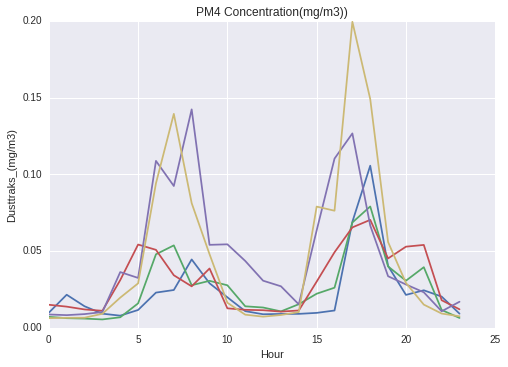

In [6]:
featurehourplot(dfabove14, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(df1214, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3))')
featurehourplot(df1012, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(df810, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3))')
featurehourplot(dfbelow8, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3))')
plt.show()


### Separate Outdoor Temp by Standard Deviation

In [7]:
df['DailyAverageTemp'].std()

2.8679288926905757

In [8]:


def getwarmdf(df):
    tempstd = df['DailyAverageTemp'].std()
    tempmean = df['DailyAvgTemp'].mean()
    warmdf = df[df['DailyAvgTemp'] >= tempmean+tempstd]
    return warmdf
def getmiddf(df):
    tempstd = df['DailyAverageTemp'].std()
    tempmean=df['DailyAvgTemp'].mean()
    middf = df[df['DailyAvgTemp']>= tempmean - tempstd]
    middf = middf[df['DailyAvgTemp'] < tempmean+tempstd]
    return middf
def getcolddf(df):
    tempstd = df['DailyAverageTemp'].std()
    tempmean = df['DailyAvgTemp'].mean()
    colddf = df[df['DailyAvgTemp'] < tempmean - tempstd]
    return colddf
dfwarm = getwarmdf(df)
dfmidtemp = getmiddf(df)
dfcold = getcolddf(df)

/home/brenna/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


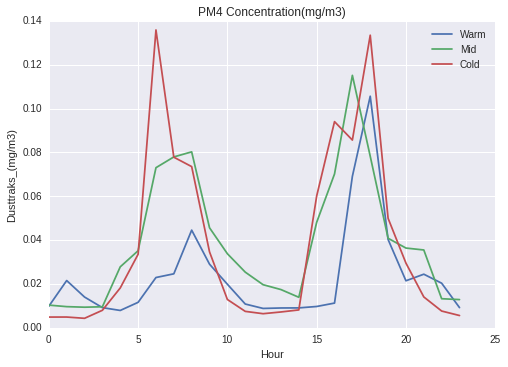

In [9]:
featurehourplot(dfwarm, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(dfmidtemp, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3))')
featurehourplot(dfcold, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
plt.legend(['Warm', 'Mid', 'Cold'])
plt.show()


### Separate Indoor/Outdoor Difference by Standard Deviation

In [10]:
def tempdifference(df, house):
    df['tempdifference'] = df[house]
    df['tempdifference'] = df[house]-df['Temperature_(degC)']
    return df
  
df = tempdifference(df, 'H01-K-E')

In [11]:
dfcold = tempdifference(dfcold, 'H01-K-E')
dfmidtemp = tempdifference(dfmidtemp, 'H01-K-E')
dfwarm = tempdifference(dfwarm, 'H01-K-E')

/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/brenna/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


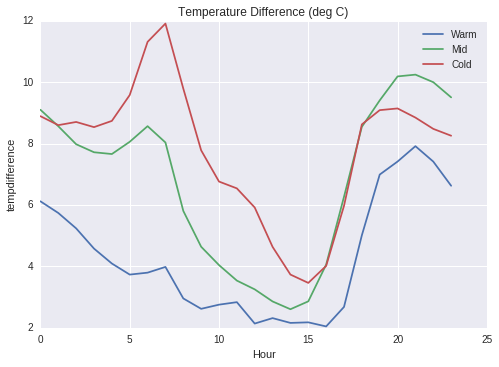

In [12]:
featurehourplot(dfwarm, 'tempdifference', 'Temperature Difference (deg C)')
featurehourplot(dfmidtemp, 'tempdifference', 'Temperature Difference (deg C)')
featurehourplot(dfcold, 'tempdifference', 'Temperature Difference (deg C)')
plt.legend(['Warm', 'Mid', 'Cold'])
plt.show()


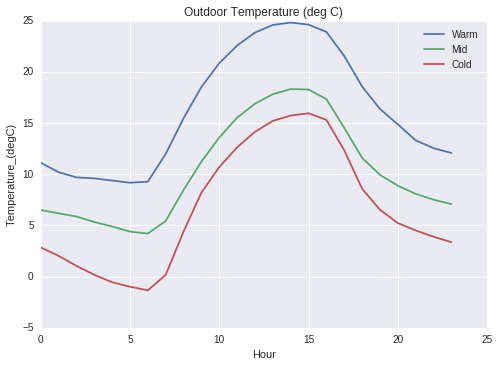

In [13]:
featurehourplot(dfwarm, 'Temperature_(degC)', 'Outdoor Temperature  (deg C)')
featurehourplot(dfmidtemp, 'Temperature_(degC)', 'Outdoor Temperature (deg C)')
featurehourplot(dfcold, 'Temperature_(degC)', 'Outdoor Temperature (deg C)')
plt.legend(['Warm', 'Mid', 'Cold'])
plt.show()

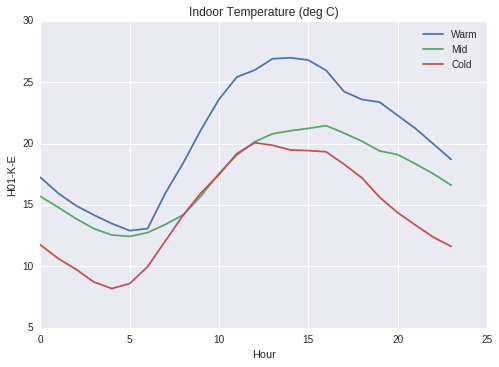

In [14]:
featurehourplot(dfwarm, 'H01-K-E', 'Indoor Temperature  (deg C)')
featurehourplot(dfmidtemp, 'H01-K-E', 'Indoor Temperature (deg C)')
featurehourplot(dfcold, 'H01-K-E', 'Indoor Temperature (deg C)')
plt.legend(['Warm', 'Mid', 'Cold'])
plt.show()

###### How is the data distributed? 

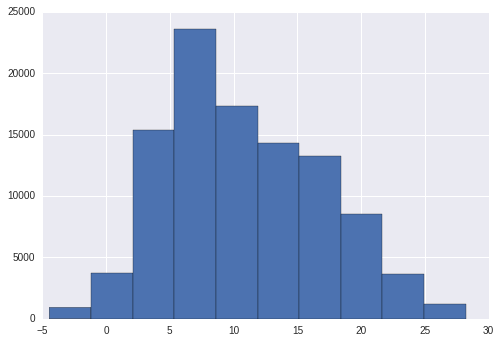

In [15]:
plt.figure()
df['Temperature_(degC)'].hist()
plt.show()

#### Data is not normally distributed. 
Very few days lower than a standard deviation below median temperature.
Let's try setting the center bound to half a standard deviation. 

#### Let's try dividing up by IQR

In [16]:
dfmedian = df['DailyAverageTemp'].median()
dfabovemed = df[df['DailyAverageTemp'] > dfmedian]
dfbelowmed = df[df['DailyAverageTemp'] < dfmedian]
dfQ3cutoff = dfabovemed['DailyAverageTemp'].median()
dfQ1cutoff = dfbelowmed['DailyAverageTemp'].median()



dfQ1 = df[df['DailyAverageTemp'] <= dfQ1cutoff]
dfQ2 = df[df['DailyAverageTemp'] > dfQ1cutoff]
dfQ2 = dfQ2[dfQ2['DailyAverageTemp'] < dfQ3cutoff]
dfQ3 = df[df['DailyAverageTemp'] >= dfQ3cutoff]

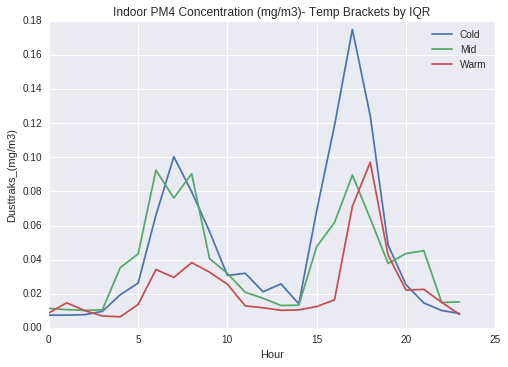

In [17]:
featurehourplot(dfQ1, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(dfQ2, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3))')
featurehourplot(dfQ3, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
plt.legend(['Cold', 'Mid', 'Warm'])
plt.title('Indoor PM4 Concentration (mg/m3)- Temp Brackets by IQR')
plt.show()


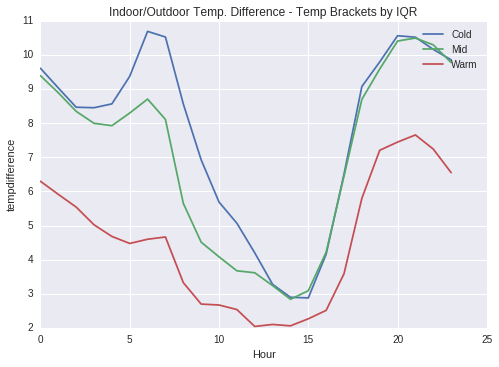

In [18]:
featurehourplot(dfQ1, 'tempdifference', 'Temperature Difference (deg C)')
featurehourplot(dfQ2, 'tempdifference', 'Temperature Difference (deg C)')
featurehourplot(dfQ3, 'tempdifference', 'Temperature Difference (deg C)')
plt.legend(['Cold', 'Mid', 'Warm'])
plt.title('Indoor/Outdoor Temp. Difference - Temp Brackets by IQR')
plt.show()


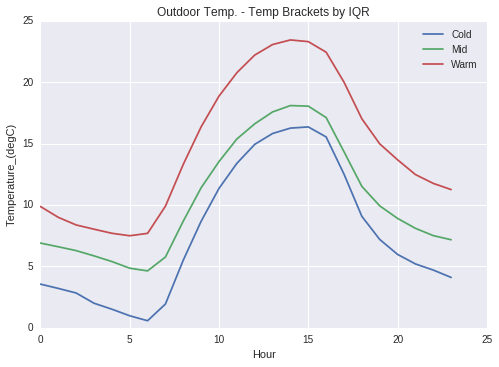

In [19]:
featurehourplot(dfQ1, 'Temperature_(degC)', 'Outdoor Temperature  (deg C)')
featurehourplot(dfQ2, 'Temperature_(degC)', 'Outdoor Temperature (deg C)')
featurehourplot(dfQ3, 'Temperature_(degC)', 'Outdoor Temperature (deg C)')
plt.legend(['Cold', 'Mid', 'Warm'])
plt.title('Outdoor Temp. - Temp Brackets by IQR')
plt.show()

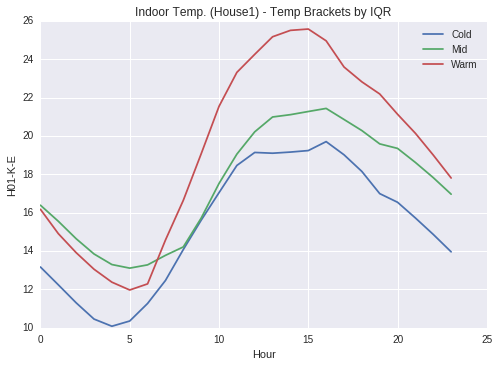

In [20]:
featurehourplot(dfQ1, 'H01-K-E', 'Indoor Temperature  (deg C)')
featurehourplot(dfQ2, 'H01-K-E', 'Indoor Temperature (deg C)')
featurehourplot(dfQ3, 'H01-K-E', 'Indoor Temperature (deg C)')
plt.legend(['Cold', 'Mid', 'Warm'])
plt.title('Indoor Temp. (House1) - Temp Brackets by IQR')
plt.show()

## For Pre-Post Intervention Comparison:

### Choosing bracket cutoff temperatures to use across years

In [21]:
df2013 = pd.read_csv('Kwadela_winter_2013_cleaned.csv')
print df.info()
df2014 = pd.read_csv('Kwadela_winter_2014_cleaned.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125475 entries, 0 to 125474
Data columns (total 32 columns):
Unnamed: 0            125475 non-null int64
Dusttraks_(mg/m3)     116559 non-null float64
PM10_(ug/m3)          64669 non-null float64
PM2.5_(ug/m3)         79939 non-null float64
SO2_(ppb)             86106 non-null float64
CO_(ppm)              18618 non-null float64
NO_(ppb)              65526 non-null float64
NO2_(ppb)             65661 non-null float64
Date                  125475 non-null object
Temperature_(degC)    101947 non-null float64
H01-K-E               125288 non-null float64
H02-K-N               105235 non-null float64
H03-K-S               125304 non-null float64
H04-K-S               125275 non-null float64
H05-K-N               122834 non-null float64
H06-K-N               125353 non-null float64
H07-K-S               81779 non-null float64
H10-K-N               125297 non-null float64
H11-K-X               113919 non-null float64
H12-K-N               125

In [22]:
df2013 = preprocess(df2013)
df2013['Dusttraks_(mg/m3)']= df2013['Dusttraks_(mg/m3)']*0.14
df2013 = daysSinceStart(df2013)
grouped13 = df2013.groupby('DayCount')
df2013 = grouped13.apply(compute_avg_temp)
df2013 = tempdifference(df2013, 'H01-K-E')

In [23]:


#df2014 = preprocess(df2014)

df2014['Dusttraks_(mg/m3)']= df2014['Dusttraks_(mg/m3)']*0.14
df2014 = daysSinceStart(df2014)
grouped14 = df2014.groupby('DayCount')
df2014 = grouped14.apply(compute_avg_temp)
df2014 = tempdifference(df2014, 'H01-K-E')

In [24]:

df2013median = df2013['DailyAvgTemp'].median()
df2013abovemed = df2013[df2013['DailyAvgTemp'] > df2013median]
df2013belowmed = df2013[df2013['DailyAvgTemp'] < df2013median]
df2013Q3cutoff = df2013abovemed['DailyAvgTemp'].median()
df2013Q1cutoff = df2013belowmed['DailyAvgTemp'].median()



df2014median = df2014['DailyAvgTemp'].median()
df2014abovemed = df2014[df2014['DailyAvgTemp'] > df2014median]
df2014belowmed = df2014[df2014['DailyAvgTemp'] < df2014median]
df2014Q3cutoff = df2014abovemed['DailyAvgTemp'].median()
df2014Q1cutoff = df2014belowmed['DailyAvgTemp'].median()





print ('2013 cold temp cutoff = ')
print (df2013Q1cutoff)


print('2014 cold temp cutoff = ')
print(df2014Q1cutoff)

print('2014 warm temp cutoff')
print(df2014Q3cutoff)

2013 cold temp cutoff = 
8.6259
2014 cold temp cutoff = 
8.71066111111
2014 warm temp cutoff
14.4178590278


### Based  on these results we will use 8.7 degrees C as the Cold temperature cutoff, and 14.4 as the warm temperature cutoff.

In [25]:
warmcutoff = 14.4
coldcutoff = 8.7


df2013cold = df2013[df2013['DailyAvgTemp'] <= coldcutoff]
df2013mid = df2013[df2013['DailyAvgTemp'] > coldcutoff]
df2013mid = df2013mid[df2013mid['DailyAvgTemp'] < warmcutoff]
df2013warm = df2013[df2013['DailyAvgTemp'] >= warmcutoff]

df2014cold = df2014[df2014['DailyAvgTemp'] <= coldcutoff]
df2014mid = df2014[df2014['DailyAvgTemp'] > coldcutoff]
df2014mid = df2014mid[df2014mid['DailyAvgTemp'] < warmcutoff]
df2014warm = df2014[df2014['DailyAvgTemp'] >= warmcutoff]

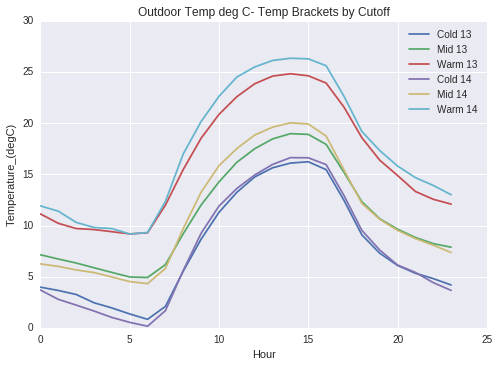

In [26]:
featurehourplot(df2013cold, 'Temperature_(degC)', 'Temperature(degC))')
featurehourplot(df2013mid, 'Temperature_(degC)', 'Temperature(degC)')
featurehourplot(df2013warm, 'Temperature_(degC)', 'Temperature(degC))')
featurehourplot(df2014cold, 'Temperature_(degC)', 'Temperature(degC)')
featurehourplot(df2014mid, 'Temperature_(degC)', 'Temperature(degC))')
featurehourplot(df2014warm, 'Temperature_(degC)', 'Temperature(degC)')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.title('Outdoor Temp deg C- Temp Brackets by Cutoff')
plt.show()


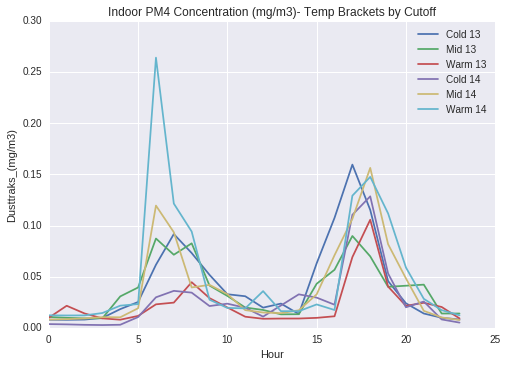

In [27]:
featurehourplot(df2013cold, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(df2013mid, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3))')
featurehourplot(df2013warm, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(df2014cold, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(df2014mid, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3))')
featurehourplot(df2014warm, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.title('Indoor PM4 Concentration (mg/m3)- Temp Brackets by Cutoff')
plt.show()


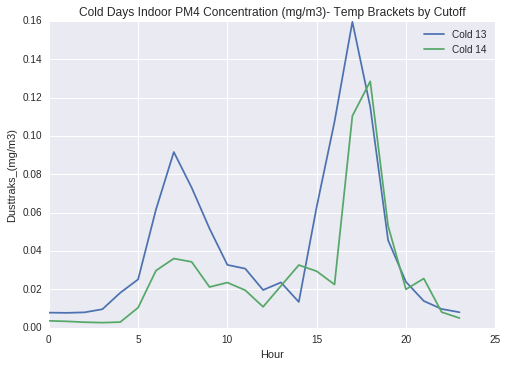

In [45]:
featurehourplot(df2013cold, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(df2014cold, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
plt.legend(['Cold 13', 'Cold 14'])
plt.title('Cold Days Indoor PM4 Concentration (mg/m3)- Temp Brackets by Cutoff')
plt.show()
#

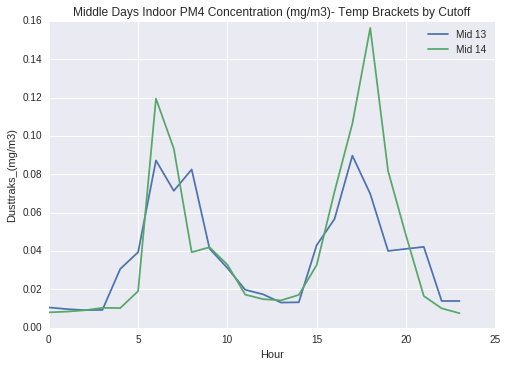

In [46]:
featurehourplot(df2013mid, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(df2014mid, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
plt.legend(['Mid 13', 'Mid 14'])
plt.title('Middle Days Indoor PM4 Concentration (mg/m3)- Temp Brackets by Cutoff')
plt.show()


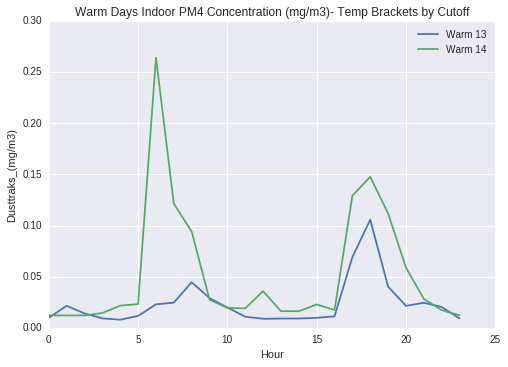

In [47]:
featurehourplot(df2013warm, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
featurehourplot(df2014warm, 'Dusttraks_(mg/m3)', 'PM4 Concentration(mg/m3)')
plt.legend(['Warm 13', 'Warm 14'])
plt.title('Warm Days Indoor PM4 Concentration (mg/m3)- Temp Brackets by Cutoff')
plt.show()


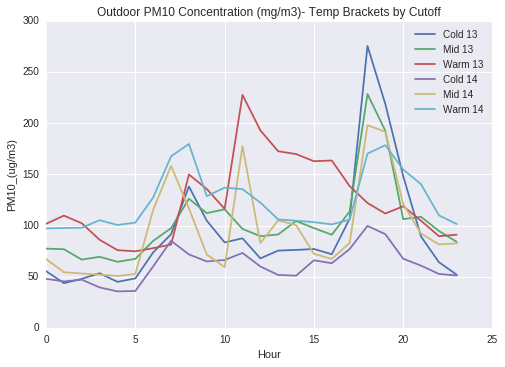

In [31]:
featurehourplot(df2013cold, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3)')
featurehourplot(df2013mid, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3))')
featurehourplot(df2013warm, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3)')
featurehourplot(df2014cold, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3)')
featurehourplot(df2014mid, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3))')
featurehourplot(df2014warm, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3)')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.title('Outdoor PM10 Concentration (ug/m3)- Temp Brackets by Cutoff')
plt.show()


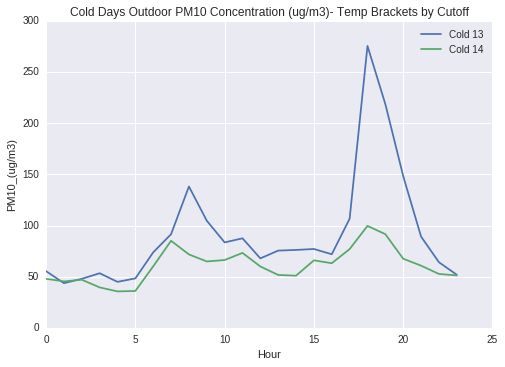

In [32]:
featurehourplot(df2013cold, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3)')
featurehourplot(df2014cold, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3))')
plt.legend(['Cold 13', 'Cold 14'])
plt.title('Cold Days Outdoor PM10 Concentration (ug/m3)- Temp Brackets by Cutoff')
plt.show()


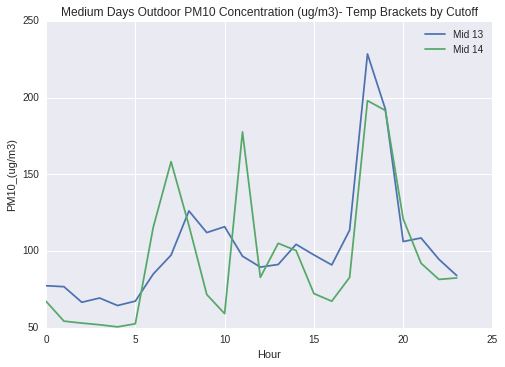

In [33]:
featurehourplot(df2013mid, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3)')
featurehourplot(df2014mid, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3))')
plt.legend(['Mid 13', 'Mid 14'])
plt.title('Medium Days Outdoor PM10 Concentration (ug/m3)- Temp Brackets by Cutoff')
plt.show()


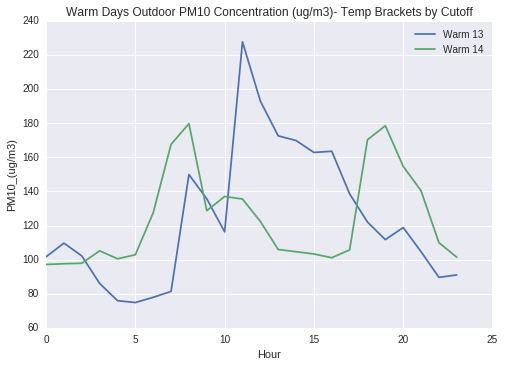

In [34]:
featurehourplot(df2013warm, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3)')
featurehourplot(df2014warm, 'PM10_(ug/m3)', 'PM10 Concentration(ug/m3))')
plt.legend(['Warm 13', 'Warm 14'])
plt.title('Warm Days Outdoor PM10 Concentration (ug/m3)- Temp Brackets by Cutoff')
plt.show()


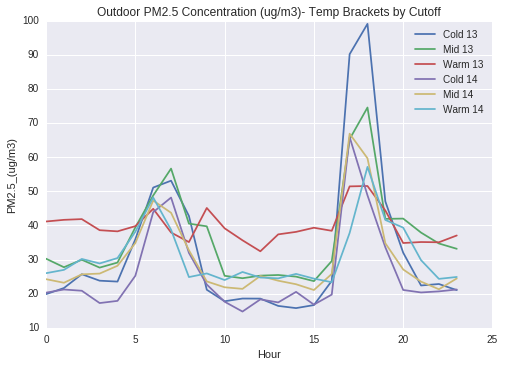

In [35]:
featurehourplot(df2013cold, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3)')
featurehourplot(df2013mid, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3))')
featurehourplot(df2013warm, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3)')
featurehourplot(df2014cold, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3)')
featurehourplot(df2014mid, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3))')
featurehourplot(df2014warm, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3)')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.title('Outdoor PM2.5 Concentration (ug/m3)- Temp Brackets by Cutoff')
plt.show()


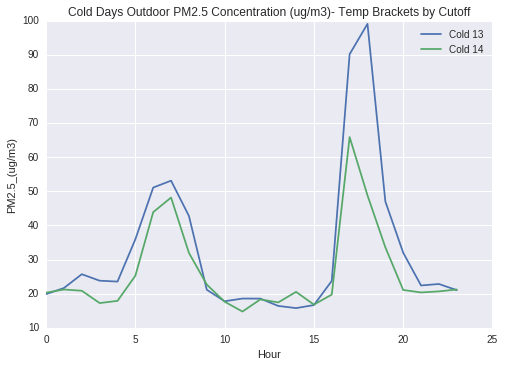

In [36]:
featurehourplot(df2013cold, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3)')
featurehourplot(df2014cold, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3))')
plt.legend(['Cold 13',  'Cold 14'])
plt.title('Cold Days Outdoor PM2.5 Concentration (ug/m3)- Temp Brackets by Cutoff')
plt.show()


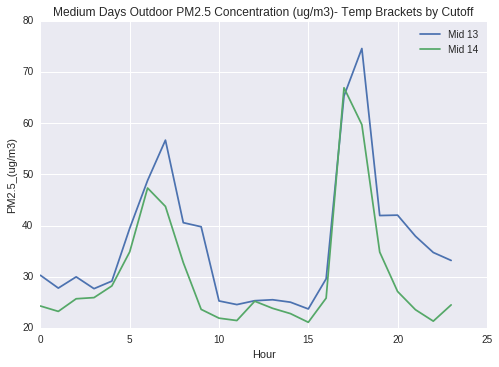

In [37]:
featurehourplot(df2013mid, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3)')
featurehourplot(df2014mid, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3))')
plt.legend(['Mid 13',  'Mid 14'])
plt.title('Medium Days Outdoor PM2.5 Concentration (ug/m3)- Temp Brackets by Cutoff')
plt.show()


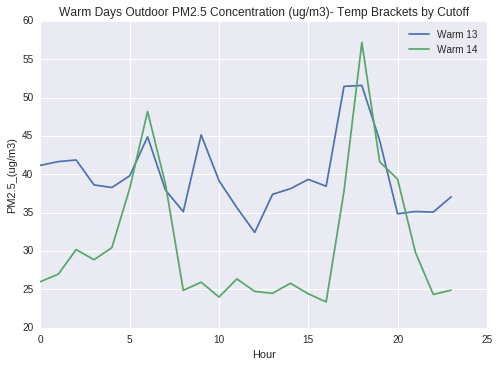

In [38]:
featurehourplot(df2013warm, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3)')
featurehourplot(df2014warm, 'PM2.5_(ug/m3)', 'PM2.5 Concentration(ug/m3))')
plt.legend(['Warm 13',  'Warm 14'])
plt.title('Warm Days Outdoor PM2.5 Concentration (ug/m3)- Temp Brackets by Cutoff')
plt.show()


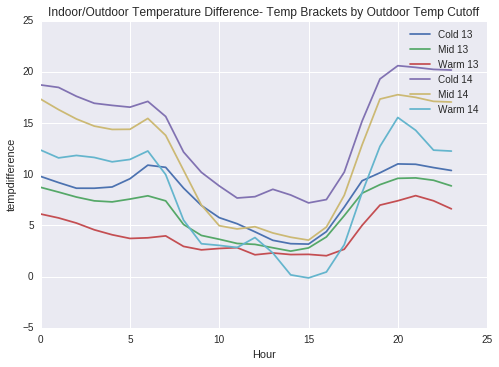

In [39]:
featurehourplot(df2013cold, 'tempdifference', 'Temperature Difference (Deg C)')
featurehourplot(df2013mid, 'tempdifference', 'Temperature Difference (Deg C)')
featurehourplot(df2013warm, 'tempdifference', 'Temperature Difference (Deg C)')
featurehourplot(df2014cold, 'tempdifference', 'Temperature Difference (Deg C)')
featurehourplot(df2014mid, 'tempdifference', 'Temperature Difference (Deg C)')
featurehourplot(df2014warm, 'tempdifference', 'Temperature Difference (Deg C)')
plt.legend(['Cold 13', 'Mid 13', 'Warm 13', 'Cold 14', 'Mid 14', 'Warm 14'])
plt.title('Indoor/Outdoor Temperature Difference- Temp Brackets by Outdoor Temp Cutoff')
plt.show()


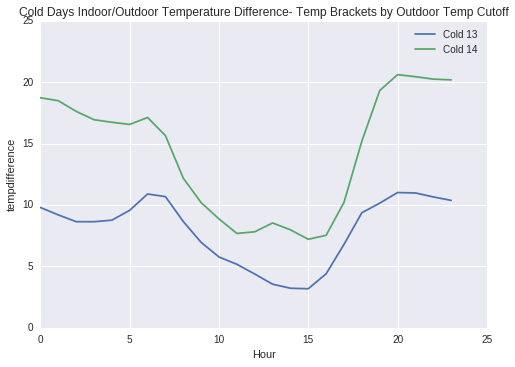

In [40]:
featurehourplot(df2013cold, 'tempdifference', 'Temperature Difference (Deg C)')
featurehourplot(df2014cold, 'tempdifference', 'Temperature Difference (Deg C)')
plt.legend(['Cold 13', 'Cold 14'])
plt.title('Cold Days Indoor/Outdoor Temperature Difference- Temp Brackets by Outdoor Temp Cutoff')
plt.show()


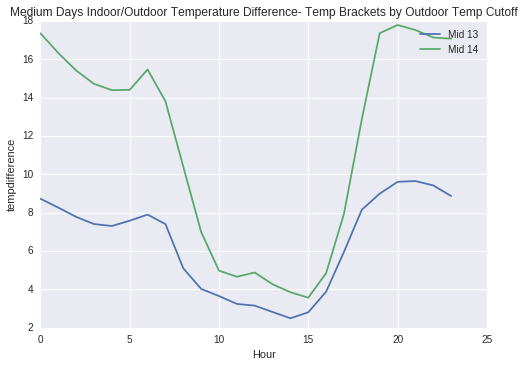

In [41]:
featurehourplot(df2013mid, 'tempdifference', 'Temperature Difference (Deg C)')
featurehourplot(df2014mid, 'tempdifference', 'Temperature Difference (Deg C)')
plt.legend(['Mid 13', 'Mid 14'])
plt.title('Medium Days Indoor/Outdoor Temperature Difference- Temp Brackets by Outdoor Temp Cutoff')
plt.show()


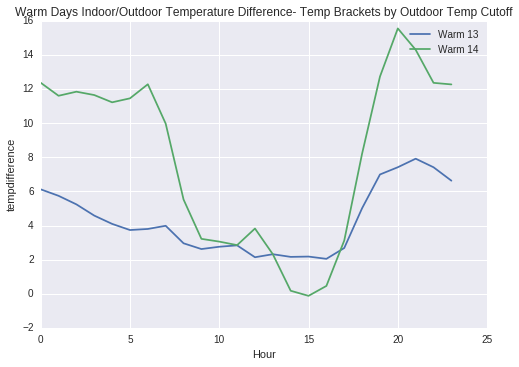

In [42]:
featurehourplot(df2013warm, 'tempdifference', 'Temperature Difference (Deg C)')
featurehourplot(df2014warm, 'tempdifference', 'Temperature Difference (Deg C)')
plt.legend(['Warm 13', 'Warm 14'])
plt.title('Warm Days Indoor/Outdoor Temperature Difference- Temp Brackets by Outdoor Temp Cutoff')
plt.show()
